# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
from matplotlib.patches import Rectangle

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    # TODO - Your implementation here
    #pass
    colormap = {1:[1, 0, 0], 2:[0, 1, 0], 4:[0, 0, 1]}

    # display the image
    fig, ax = plt.subplots(1,1,figsize=(8, 6))
    
    img = batch['image'].numpy()
    plt.imshow(img)
        
    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
        
    # draw bounding boxes and add colors to objects with different class labels
    for cl, bb in zip(classes, bboxes):
        x, y = bb[1]*img.shape[1], bb[0]*img.shape[0]
        width = (bb[3] - bb[1])*img.shape[1]
        height = (bb[2] - bb[0])*img.shape[0]
        rec = Rectangle((x, y), width, height, facecolor='none',
                            edgecolor = colormap[cl])
        ax.add_patch(rec)
    ax.axis('off')
    #plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

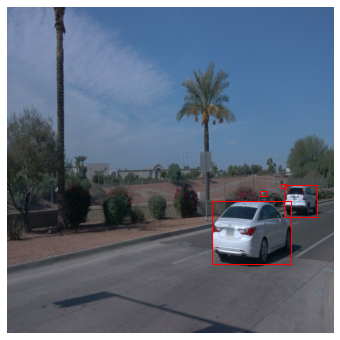

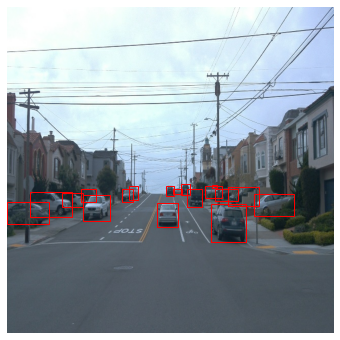

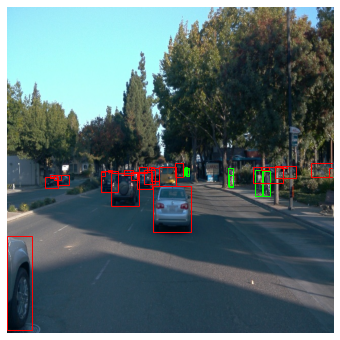

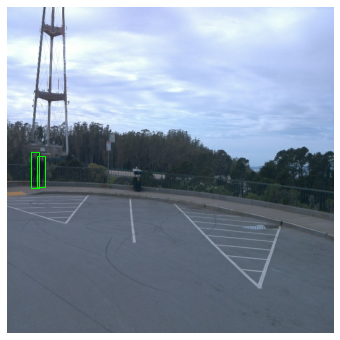

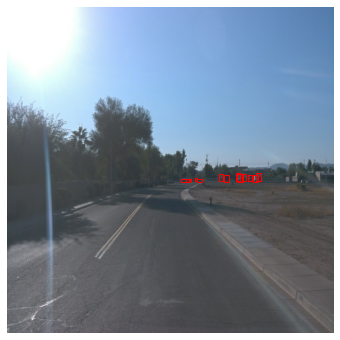

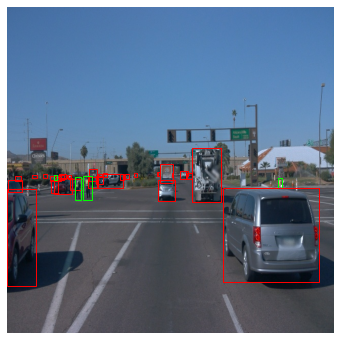

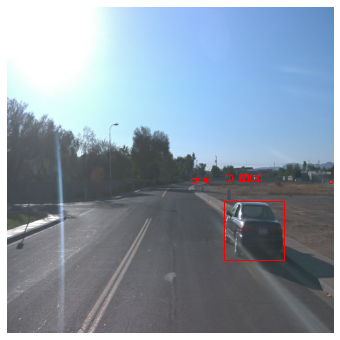

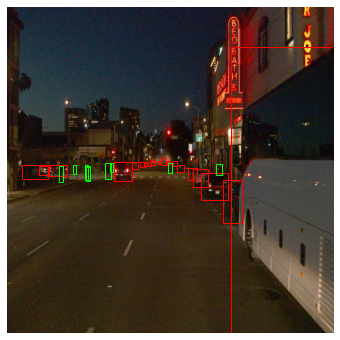

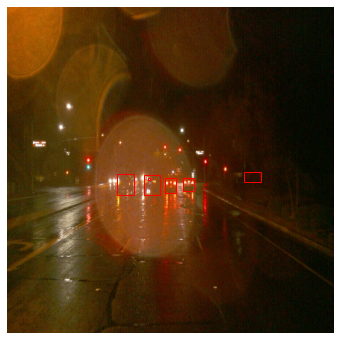

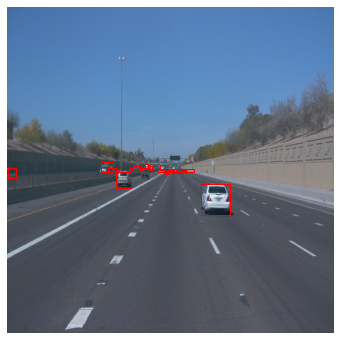

In [4]:
# Display 10 random images in dataset
num = 10
for batch in dataset.shuffle(200).take(num):
    display_images(batch)
#display_images(dataset.shuffle(86, reshuffle_each_iteration=True).take(10))


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
#count the number of car, pedestrian and cyclist 
count = {}
num1 = 2000

for data in dataset.take(num1):
    for i in range(len(data["groundtruth_classes"])):
        gt_cl = data["groundtruth_classes"].numpy()
        
        if gt_cl[i] in count.keys():
            count[gt_cl[i]] += 1
        else:
            count[gt_cl[i]] = 1

count



{1: 35426, 2: 9875, 4: 254}

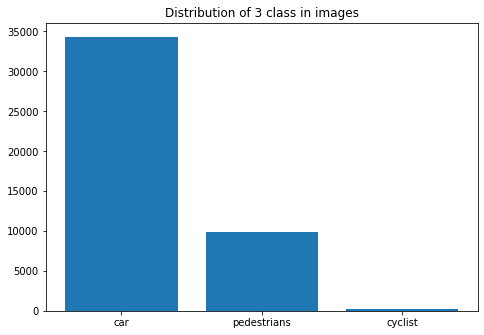

In [8]:
distribution = {1:0, 2: 0, 4: 0}
for batch in dataset.take(num1):
    for a in batch['groundtruth_classes'].numpy():
        distribution[a] += 1
classes = ["car", "pedestrians", "cyclist"]
number = distribution.values()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(classes, number)
plt.title("Distribution of 3 class in images")
plt.show()


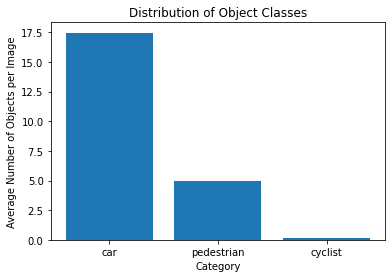

In [9]:
#Produce the average quantity and distribution of object classes in the image.
num2 = 3000
batch = dataset.take(num2)
counts = {1:0, 2:0, 4:0}

for i, instance in enumerate(batch):
    for cl in instance["groundtruth_classes"].numpy():
        counts[cl] += 1

category = {"car": counts[1] / num2, "pedestrian": counts[2] / num2, "cyclist": counts[4] / num2}
plt.bar(list(category.keys()), list(category.values()))
plt.xlabel("Category")
plt.ylabel("Average Number of Objects per Image")
plt.title("Distribution of Object Classes")
plt.show()



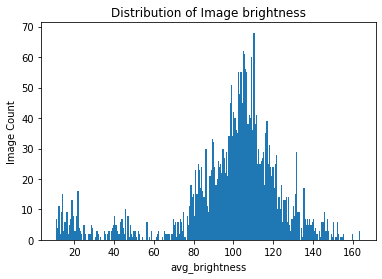

In [10]:
#produce the distribution of image lightness in the dataset.
avg_brightness= np.zeros(num2)
for i, instance in enumerate(batch):
    for gt in instance["groundtruth_classes"].numpy():
        counts[gt] += 1
    avg_brightness[i] = np.average(instance["image"].numpy())
    
plt.xlabel("avg_brightness")
plt.ylabel("Image Count")
plt.title("Distribution of Image brightness")
plt.hist(avg_brightness, bins=256)
plt.show()